In [2]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt


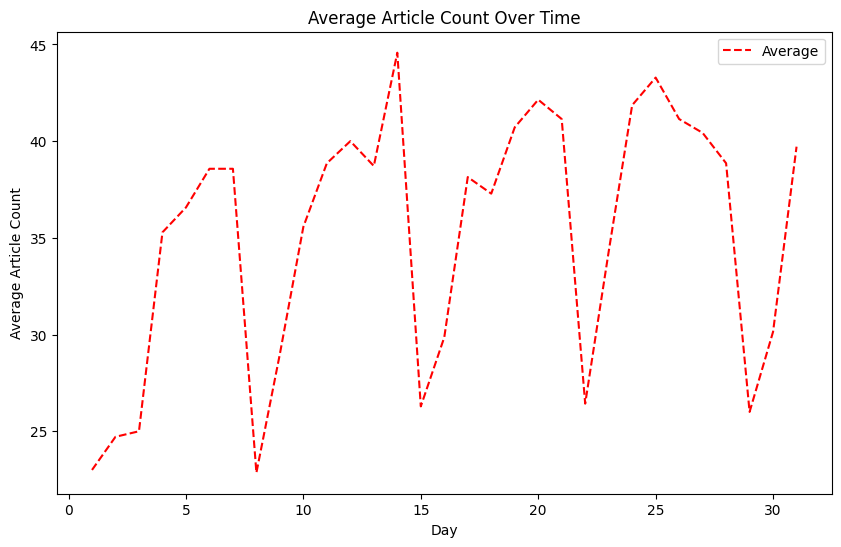

In [5]:
# Load the CSV file
df_2022 = pd.read_csv('../../data/processed/articles/2022_articles_processed.csv', sep=";")

# Convert 'Date' column to datetime
df_2022['Date'] = pd.to_datetime(df_2022['Date'])

# Extract day from 'Date'
df_2022['Day'] = df_2022['Date'].dt.day

# Group by 'Day' and 'Category' and calculate count of articles
df_grouped = df_2022.groupby(['Day', 'Category']).size().reset_index(name='Article Count')

# Calculate average article count for each day
df_average = df_grouped.groupby('Day')['Article Count'].mean()

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot average article count
ax.plot(df_average, label='Average', linestyle='--', color='red')

ax.set_title('Average Article Count Over Time')
ax.set_xlabel('Day')
ax.set_ylabel('Average Article Count')
ax.legend()

plt.show()

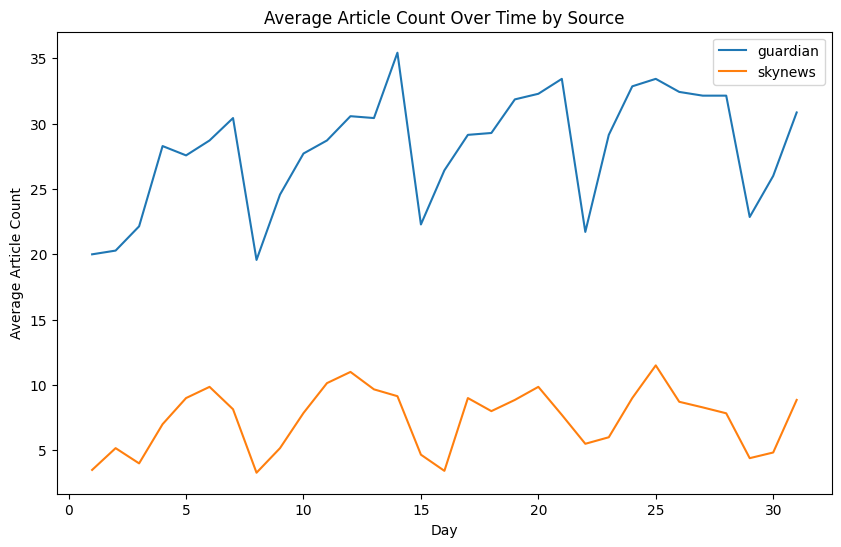

In [6]:
# Load the CSV file
df_2022 = pd.read_csv('../../data/processed/articles/2022_articles_processed.csv', sep=";")

# Convert 'Date' column to datetime
df_2022['Date'] = pd.to_datetime(df_2022['Date'])

# Extract day from 'Date'
df_2022['Day'] = df_2022['Date'].dt.day

# Group by 'Day', 'Category', and 'Source' and calculate count of articles
df_grouped = df_2022.groupby(['Day', 'Category', 'Source']).size().reset_index(name='Article Count')

# Calculate average article count for each day and source
df_average = df_grouped.groupby(['Day', 'Source'])['Article Count'].mean().unstack()

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot average article count for each source
for source in df_average.columns:
    ax.plot(df_average[source], label=source)

ax.set_title('Average Article Count Over Time by Source')
ax.set_xlabel('Day')
ax.set_ylabel('Average Article Count')
ax.legend()

plt.show()

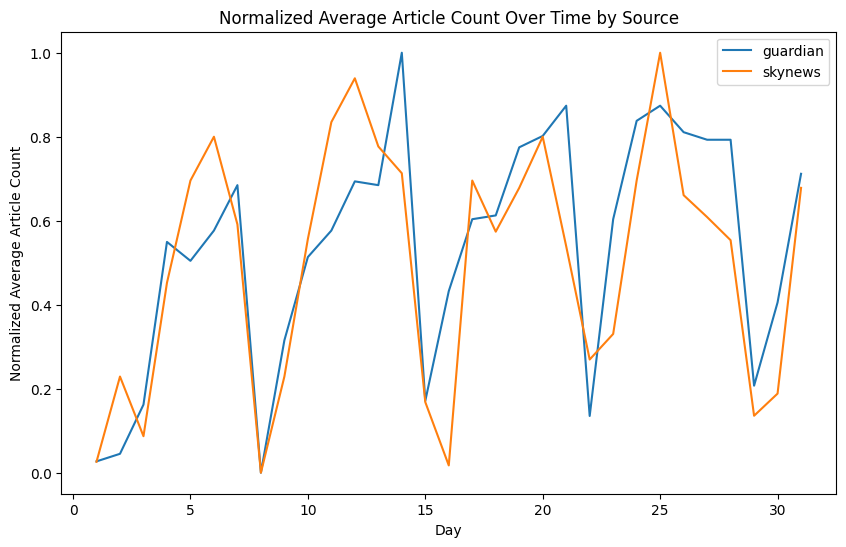

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Normalize average article count for each source
df_average_normalized = pd.DataFrame(scaler.fit_transform(df_average), 
                                     index=df_average.index, 
                                     columns=df_average.columns)

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot normalized average article count for each source
for source in df_average_normalized.columns:
    ax.plot(df_average_normalized[source], label=source)

ax.set_title('Normalized Average Article Count Over Time by Source')
ax.set_xlabel('Day')
ax.set_ylabel('Normalized Average Article Count')
ax.legend()

plt.show()

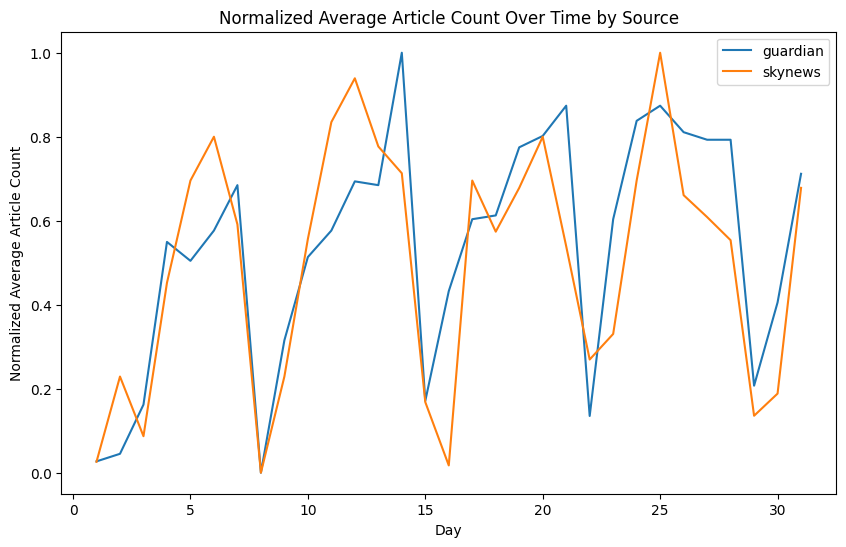

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Normalize average article count for each source
df_average_normalized = pd.DataFrame(scaler.fit_transform(df_average), 
                                     index=df_average.index, 
                                     columns=df_average.columns)

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot normalized average article count for each source
for source in df_average_normalized.columns:
    ax.plot(df_average_normalized[source], label=source)

ax.set_title('Normalized Average Article Count Over Time by Source')
ax.set_xlabel('Day')
ax.set_ylabel('Normalized Average Article Count')
ax.legend()

plt.show()

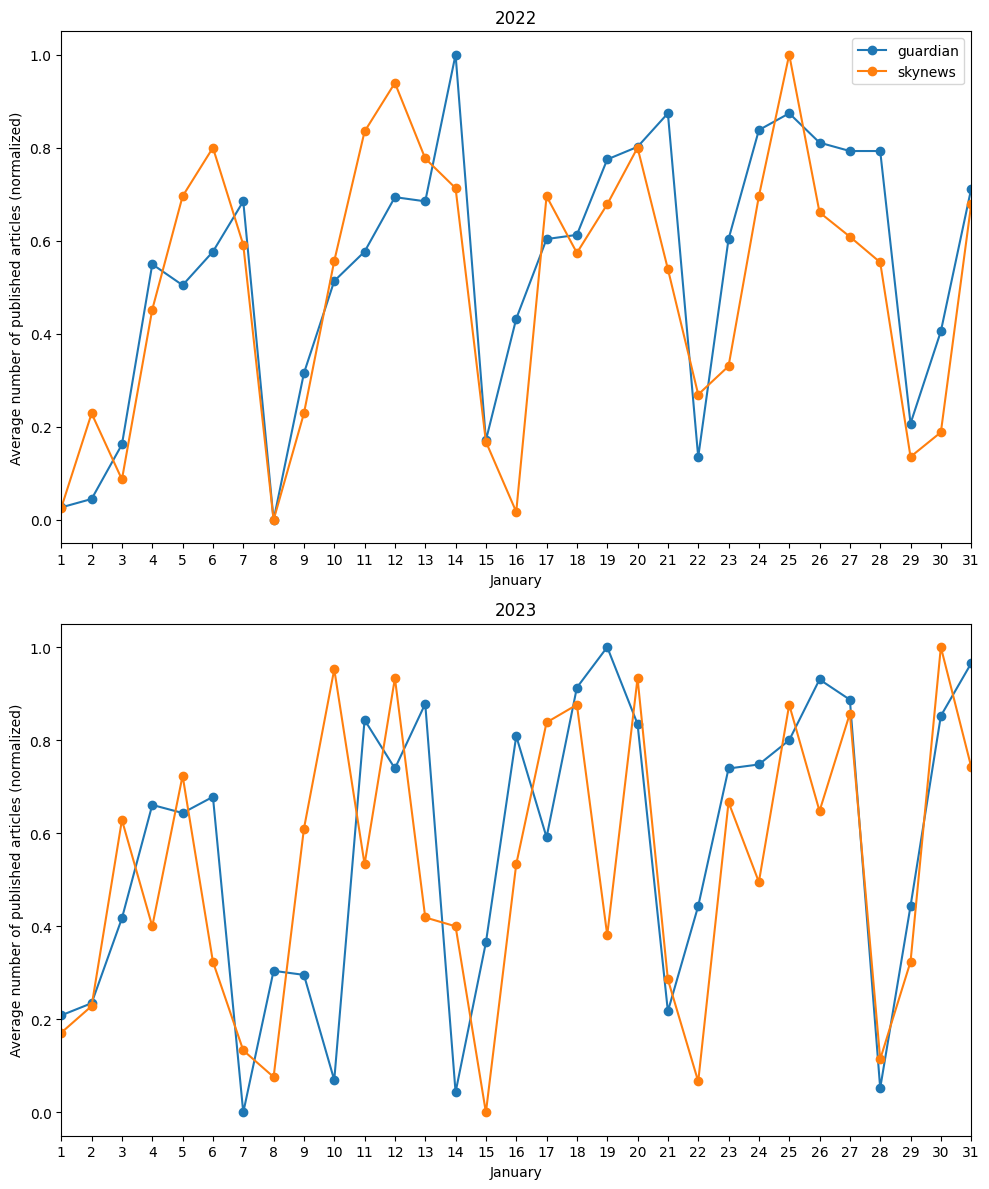

In [9]:
from sklearn.preprocessing import MinMaxScaler

def plot_normalized_average(filename, ax, legend=False):
    # Load the CSV file
    df = pd.read_csv(filename, sep=";")

    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract day from 'Date'
    df['Day'] = df['Date'].dt.day


    # Group by 'Day', 'Category', and 'Source' and calculate count of articles
    df_grouped = df.groupby(['Day', 'Category', 'Source']).size().reset_index(name='Article Count')

    # Calculate average article count for each day and source
    df_average = df_grouped.groupby(['Day', 'Source'])['Article Count'].mean().unstack()

    # Initialize scaler
    scaler = MinMaxScaler()

    # Normalize average article count for each source
    df_average_normalized = pd.DataFrame(scaler.fit_transform(df_average), 
                                         index=df_average.index, 
                                         columns=df_average.columns)

    # Plot normalized average article count for each source
    for source in df_average_normalized.columns:
        ax.plot(df_average_normalized[source], label=source, marker='o')

    # Set x-axis limits
    ax.set_xlim(df_average_normalized.index.min(), df_average_normalized.index.max())

    # Set x-axis labels
    ax.set_xticks(df_average_normalized.index)

    # Extract year from filename
    year = filename.split('/')[-1].split('_')[0]

    ax.set_title(year)
    ax.set_xlabel('January')
    ax.set_ylabel('Average number of published articles (normalized)')
    if legend:
        ax.legend()

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot data for each file
plot_normalized_average('../../data/processed/articles/2022_articles_processed.csv', axs[0], True)
plot_normalized_average('../../data/processed/articles/2023_articles_processed.csv', axs[1])

plt.tight_layout()
plt.show()

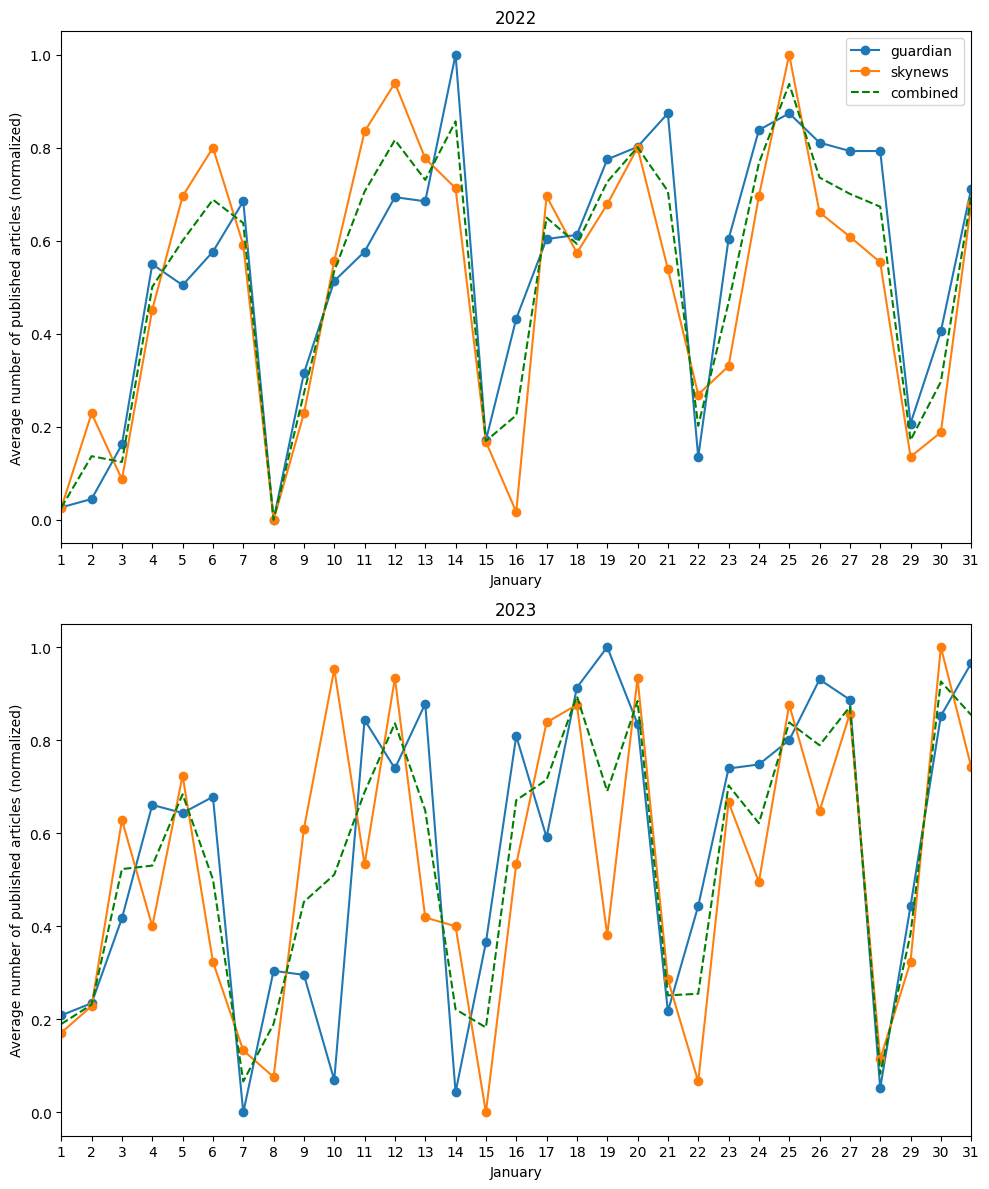

In [10]:
from sklearn.preprocessing import MinMaxScaler

def plot_normalized_average(filename, ax, legend=False):
    # Load the CSV file
    df = pd.read_csv(filename, sep=";")

    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract day from 'Date'
    df['Day'] = df['Date'].dt.day


    # Group by 'Day', 'Category', and 'Source' and calculate count of articles
    df_grouped = df.groupby(['Day', 'Category', 'Source']).size().reset_index(name='Article Count')

    # Calculate average article count for each day and source
    df_average = df_grouped.groupby(['Day', 'Source'])['Article Count'].mean().unstack()

    # Initialize scaler
    scaler = MinMaxScaler()

    # Normalize average article count for each source
    df_average_normalized = pd.DataFrame(scaler.fit_transform(df_average), 
                                         index=df_average.index, 
                                         columns=df_average.columns)
    
    # Calculate general average for all sources combined
    df_average_normalized['combined'] = df_average_normalized.mean(axis=1)

    # Plot normalized average article count for each source
    for source in df_average_normalized.columns:
        if source == 'combined':
            ax.plot(df_average_normalized[source], label=source, linestyle='--', color='green')
        else:
            ax.plot(df_average_normalized[source], label=source, marker='o')

    # Set x-axis limits
    ax.set_xlim(df_average_normalized.index.min(), df_average_normalized.index.max())

    # Set x-axis labels
    ax.set_xticks(df_average_normalized.index)

    # Extract year from filename
    year = filename.split('/')[-1].split('_')[0]

    ax.set_title(year)
    ax.set_xlabel('January')
    ax.set_ylabel('Average number of published articles (normalized)')
    if legend:
        ax.legend()

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot data for each file
plot_normalized_average('../../data/processed/articles/2022_articles_processed.csv', axs[0], True)
plot_normalized_average('../../data/processed/articles/2023_articles_processed.csv', axs[1])

plt.tight_layout()
plt.show()

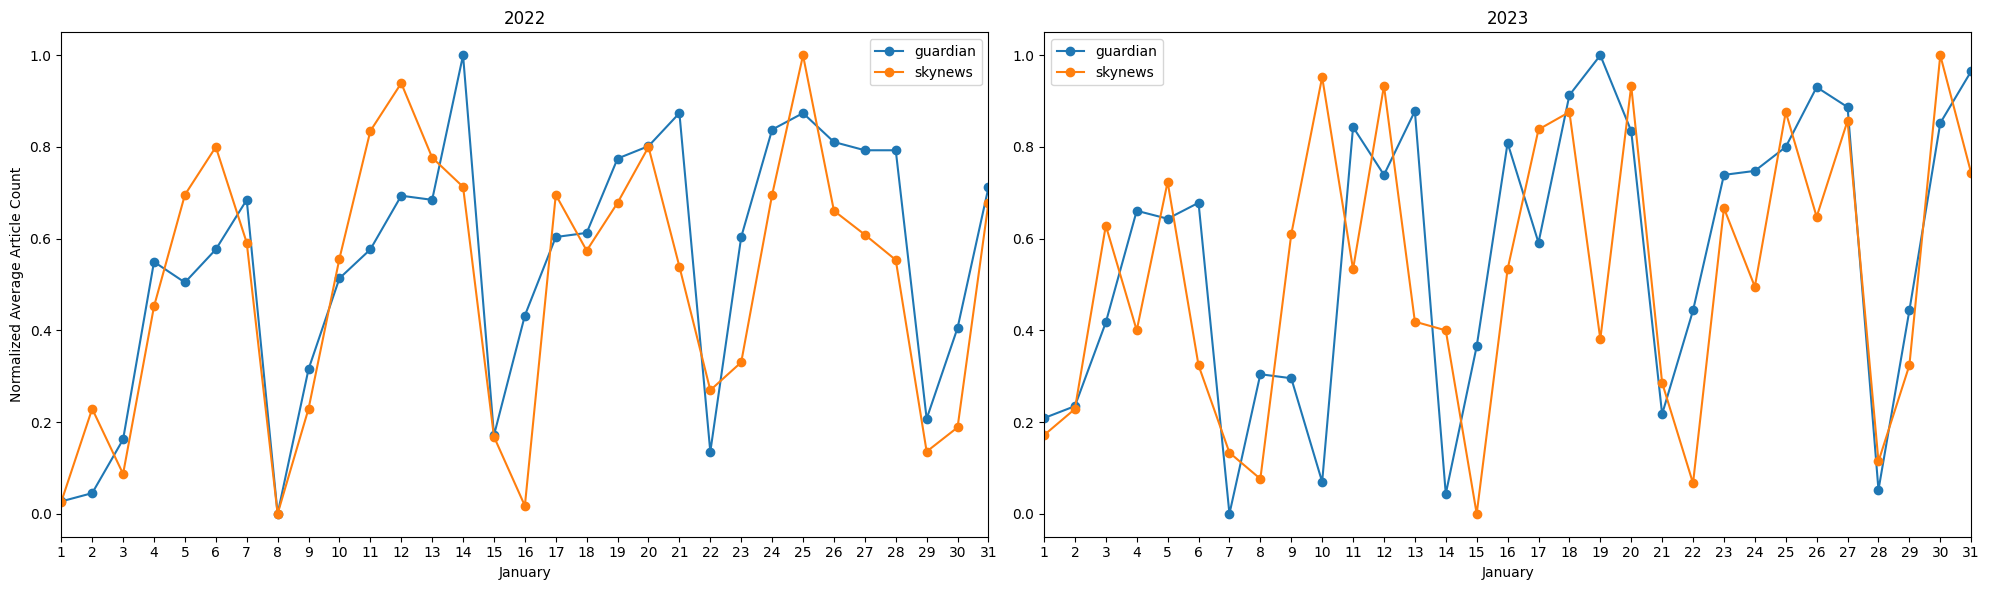

In [11]:
from sklearn.preprocessing import MinMaxScaler

def plot_normalized_average(filename, ax, ylabel=False):
    # Load the CSV file
    df = pd.read_csv(filename, sep=";")

    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract day from 'Date'
    df['Day'] = df['Date'].dt.day

    # Group by 'Day', 'Category', and 'Source' and calculate count of articles
    df_grouped = df.groupby(['Day', 'Category', 'Source']).size().reset_index(name='Article Count')

    # Calculate average article count for each day and source
    df_average = df_grouped.groupby(['Day', 'Source'])['Article Count'].mean().unstack()

    # Initialize scaler
    scaler = MinMaxScaler()

    # Normalize average article count for each source
    df_average_normalized = pd.DataFrame(scaler.fit_transform(df_average), 
                                         index=df_average.index, 
                                         columns=df_average.columns)

    # Plot normalized average article count for each source
    for source in df_average_normalized.columns:
        ax.plot(df_average_normalized[source], label=source, marker='o')

    # Set x-axis limits
    ax.set_xlim(df_average_normalized.index.min(), df_average_normalized.index.max())

    # Set x-axis labels
    ax.set_xticks(df_average_normalized.index)

    # Extract year from filename
    year = filename.split('/')[-1].split('_')[0]

    ax.set_title(year)
    ax.set_xlabel('January')
    if ylabel:
        ax.set_ylabel('Normalized Average Article Count')
    ax.legend()

# Create subplots
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot data for each file
plot_normalized_average('../../data/processed/articles/2022_articles_processed.csv', axs[0], ylabel=True)
plot_normalized_average('../../data/processed/articles/2023_articles_processed.csv', axs[1])

plt.tight_layout()
plt.show()

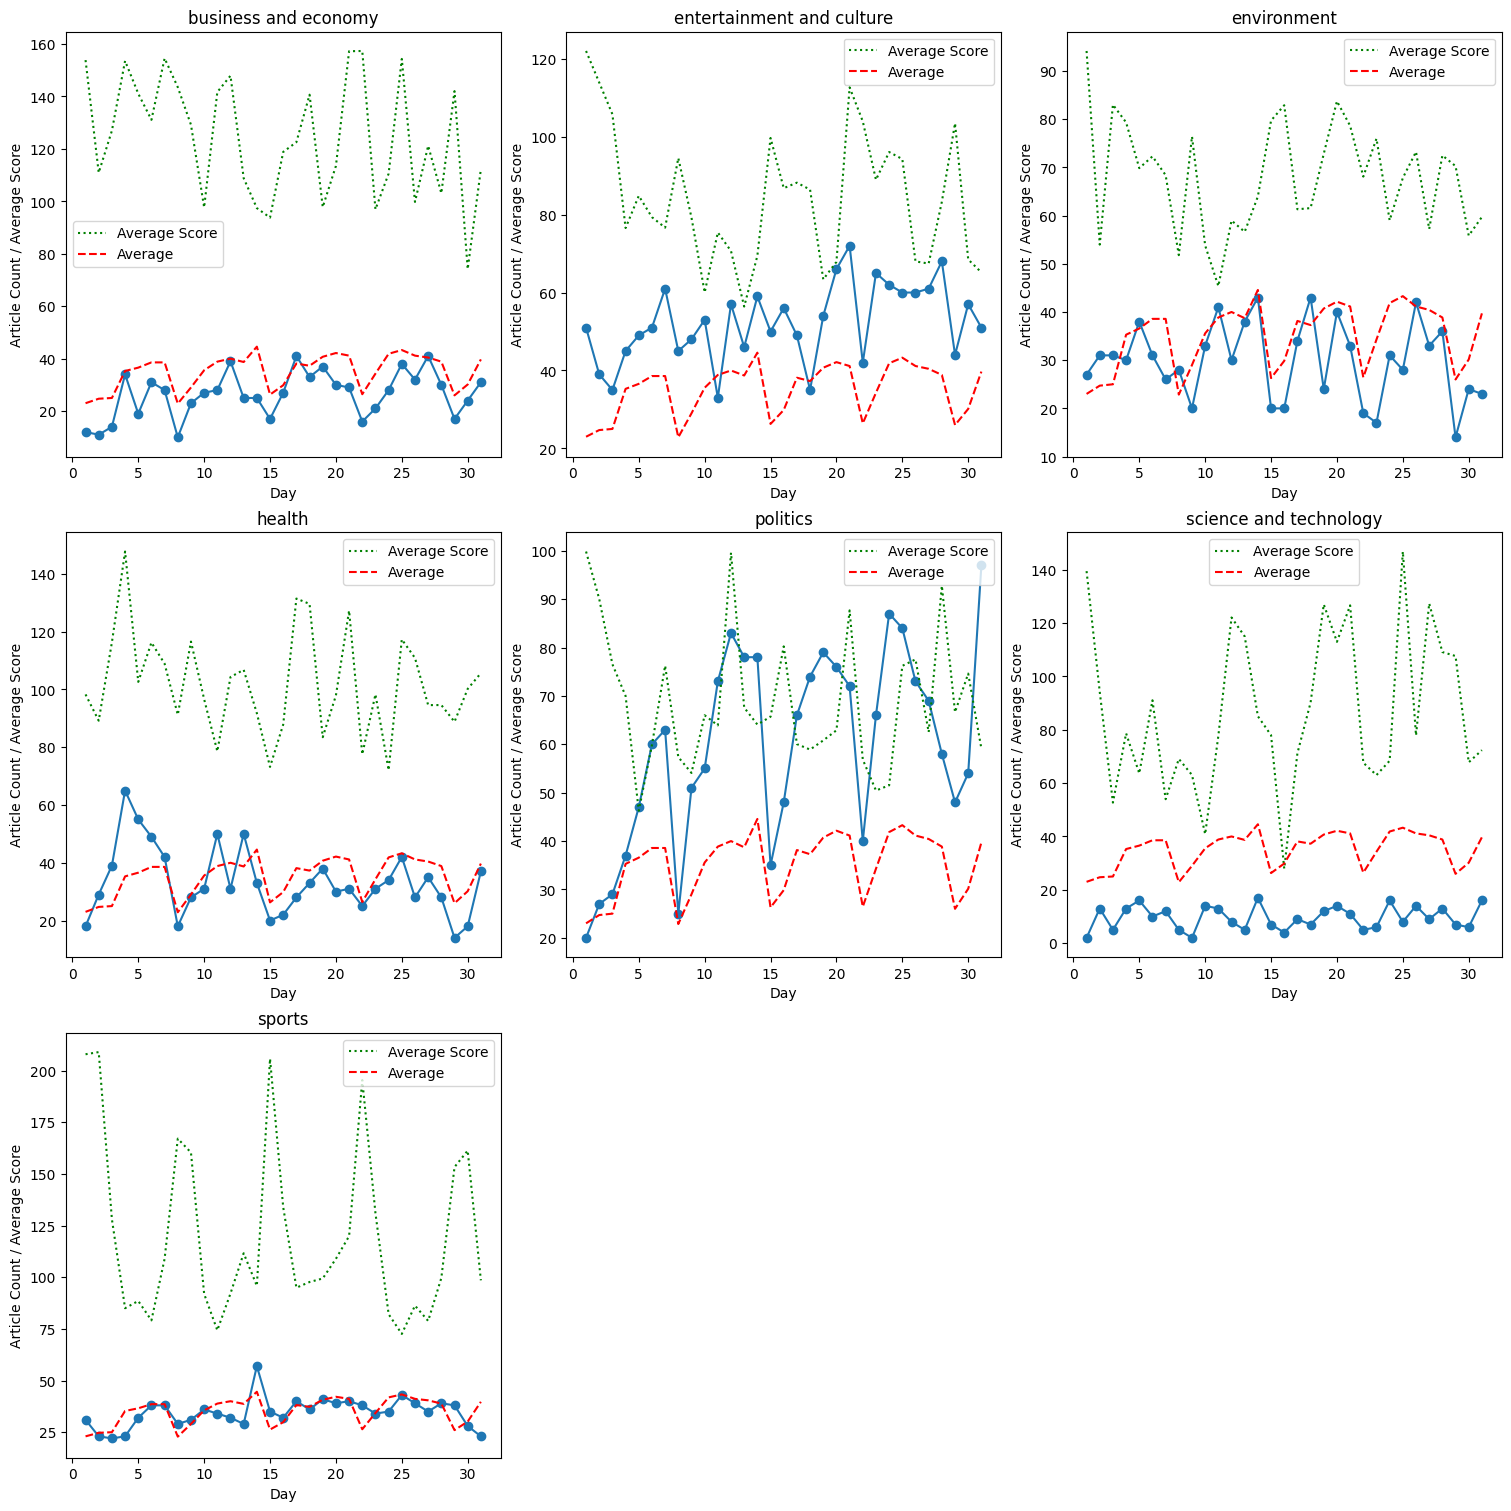

In [12]:
# Load the CSV file
df_2022 = pd.read_csv('../../data/processed/articles/2022_articles_processed.csv', sep=";")

# Convert 'Date' column to datetime
df_2022['Date'] = pd.to_datetime(df_2022['Date'])

# Extract day from 'Date'
df_2022['Day'] = df_2022['Date'].dt.day

# Group by 'Day' and 'Category' and calculate count of articles
df_grouped = df_2022.groupby(['Day', 'Category']).size().reset_index(name='Article Count')

# Get unique categories
categories = df_grouped['Category'].unique()

# Calculate number of rows and columns for subplots
n = len(categories)
ncols = 3  # Change this to 3
nrows = n // ncols + (n % ncols > 0)

# Create subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 5*nrows), constrained_layout=True)  # Adjust figsize to accommodate more columns
axs = axs.flatten()  # Flatten to 1D array

# Calculate average article count for each day
df_average = df_grouped.groupby('Day')['Article Count'].mean()

# Group by 'Day' and 'Category' and calculate average score
df_average_score = df_2022.groupby(['Day', 'Category'])['Score'].mean().reset_index(name='Average Score')

# Plot each category in its own subplot
for ax, category in zip(axs, categories):
    df_category = df_grouped[df_grouped['Category'] == category]
    df_category_score = df_average_score[df_average_score['Category'] == category]
    ax.plot(df_category['Day'], df_category['Article Count'], marker='o')
    ax.plot(df_category_score['Day'], df_category_score['Average Score'], label='Average Score', linestyle=':', color='green')  # Add average score as separate line
    ax.plot(df_average, label='Average', linestyle='--', color='red')  # Add average as reference line
    ax.set_title(category)
    ax.set_xlabel('Day')
    ax.set_ylabel('Article Count / Average Score')
    ax.legend()

# Remove unused subplots
for i in range(n, nrows*ncols):
    fig.delaxes(axs[i])

plt.show()

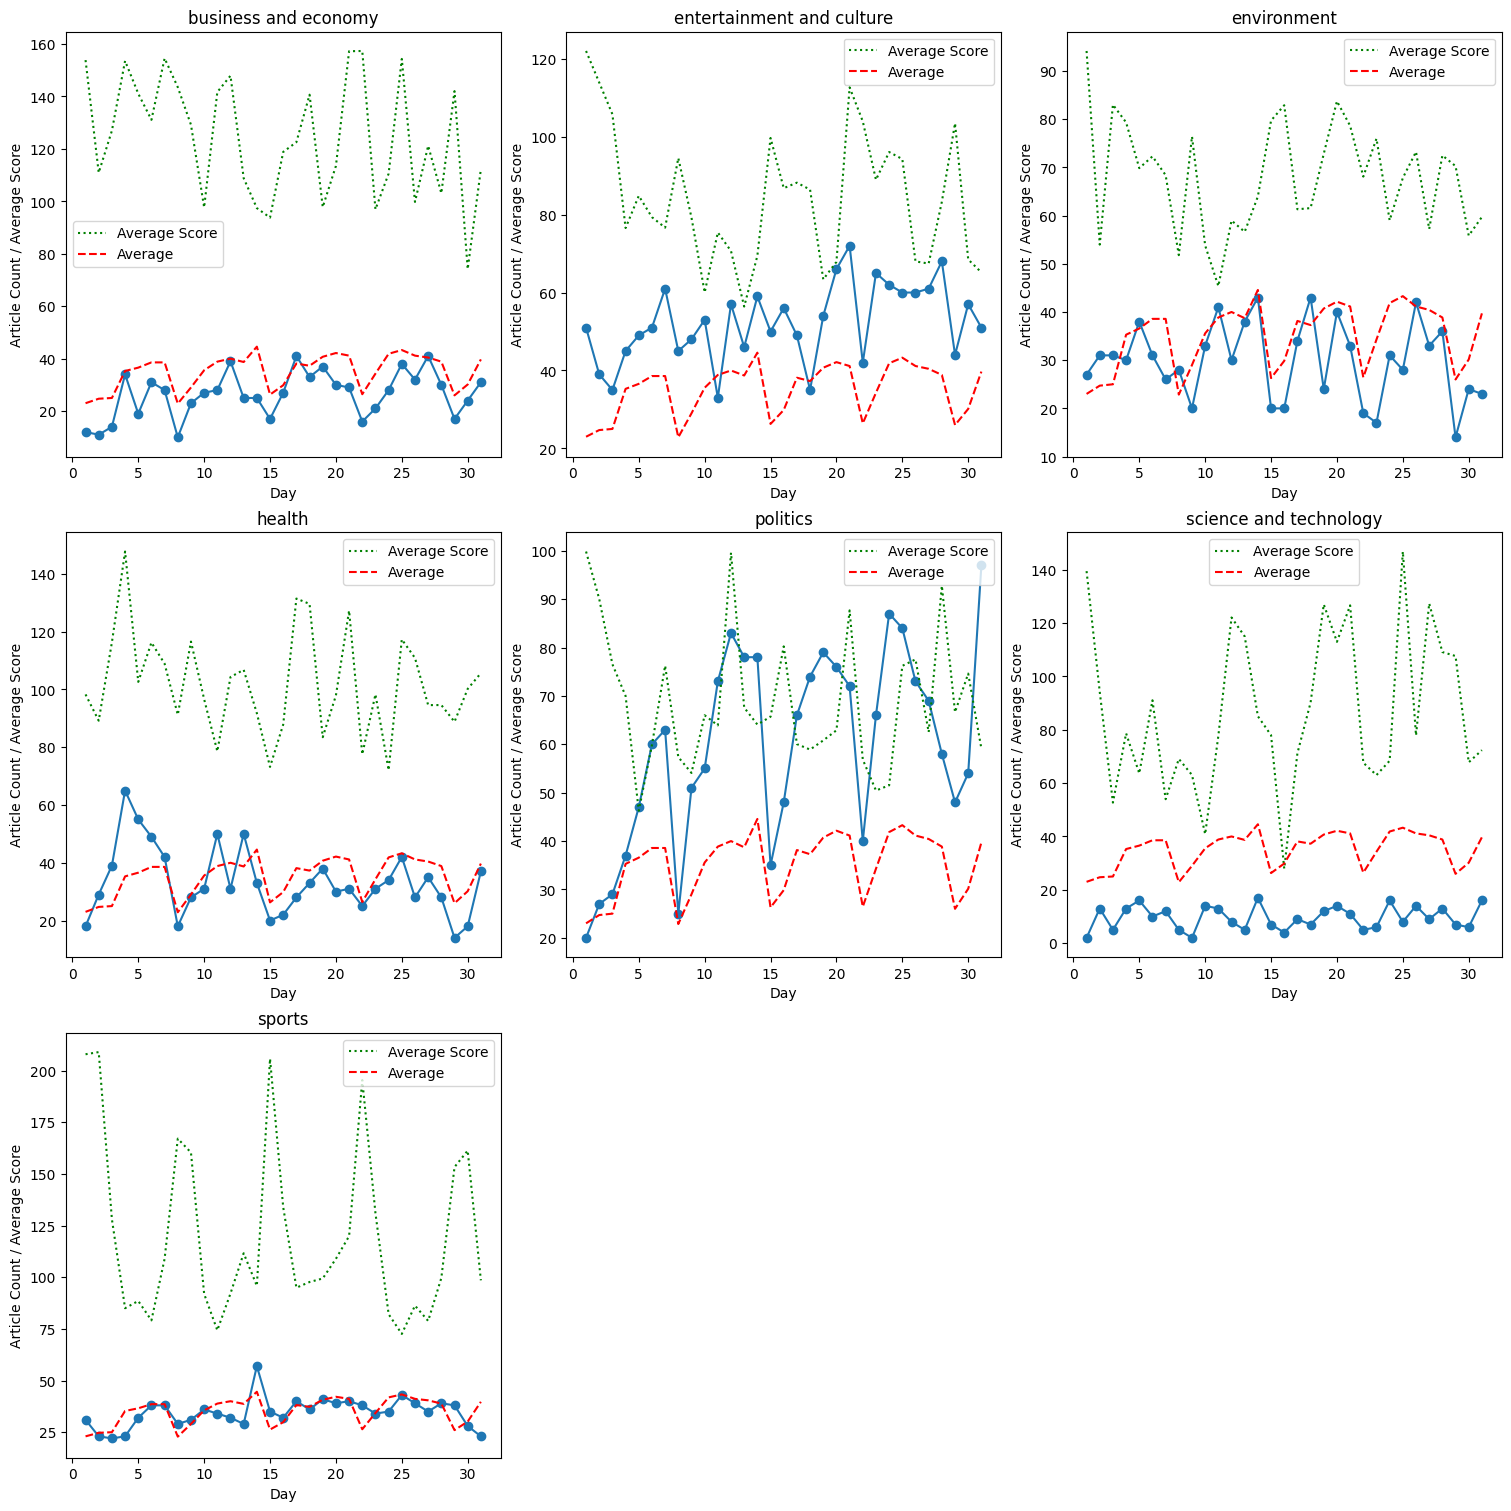

In [13]:
# Load the CSV file
df_2022 = pd.read_csv('../../data/processed/articles/2022_articles_processed.csv', sep=";")

# Convert 'Date' column to datetime
df_2022['Date'] = pd.to_datetime(df_2022['Date'])

# Extract day from 'Date'
df_2022['Day'] = df_2022['Date'].dt.day

# Group by 'Day' and 'Category' and calculate count of articles
df_grouped = df_2022.groupby(['Day', 'Category']).size().reset_index(name='Article Count')

# Get unique categories
categories = df_grouped['Category'].unique()

# Calculate number of rows and columns for subplots
n = len(categories)
ncols = 3  # Change this to 3
nrows = n // ncols + (n % ncols > 0)

# Create subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 5*nrows), constrained_layout=True)  # Adjust figsize to accommodate more columns
axs = axs.flatten()  # Flatten to 1D array

# Calculate average article count for each day
df_average = df_grouped.groupby('Day')['Article Count'].mean()

# Group by 'Day' and 'Category' and calculate average score
df_average_score = df_2022.groupby(['Day', 'Category'])['Score'].mean().reset_index(name='Average Score')

# Plot each category in its own subplot
for ax, category in zip(axs, categories):
    df_category = df_grouped[df_grouped['Category'] == category]
    df_category_score = df_average_score[df_average_score['Category'] == category]
    ax.plot(df_category['Day'], df_category['Article Count'], marker='o')
    ax.plot(df_category_score['Day'], df_category_score['Average Score'], label='Average Score', linestyle=':', color='green')  # Add average score as separate line
    ax.plot(df_average, label='Average', linestyle='--', color='red')  # Add average as reference line
    ax.set_title(category)
    ax.set_xlabel('Day')
    ax.set_ylabel('Article Count / Average Score')
    ax.legend()

# Remove unused subplots
for i in range(n, nrows*ncols):
    fig.delaxes(axs[i])

plt.show()

IndexError: index 7 is out of bounds for axis 0 with size 7

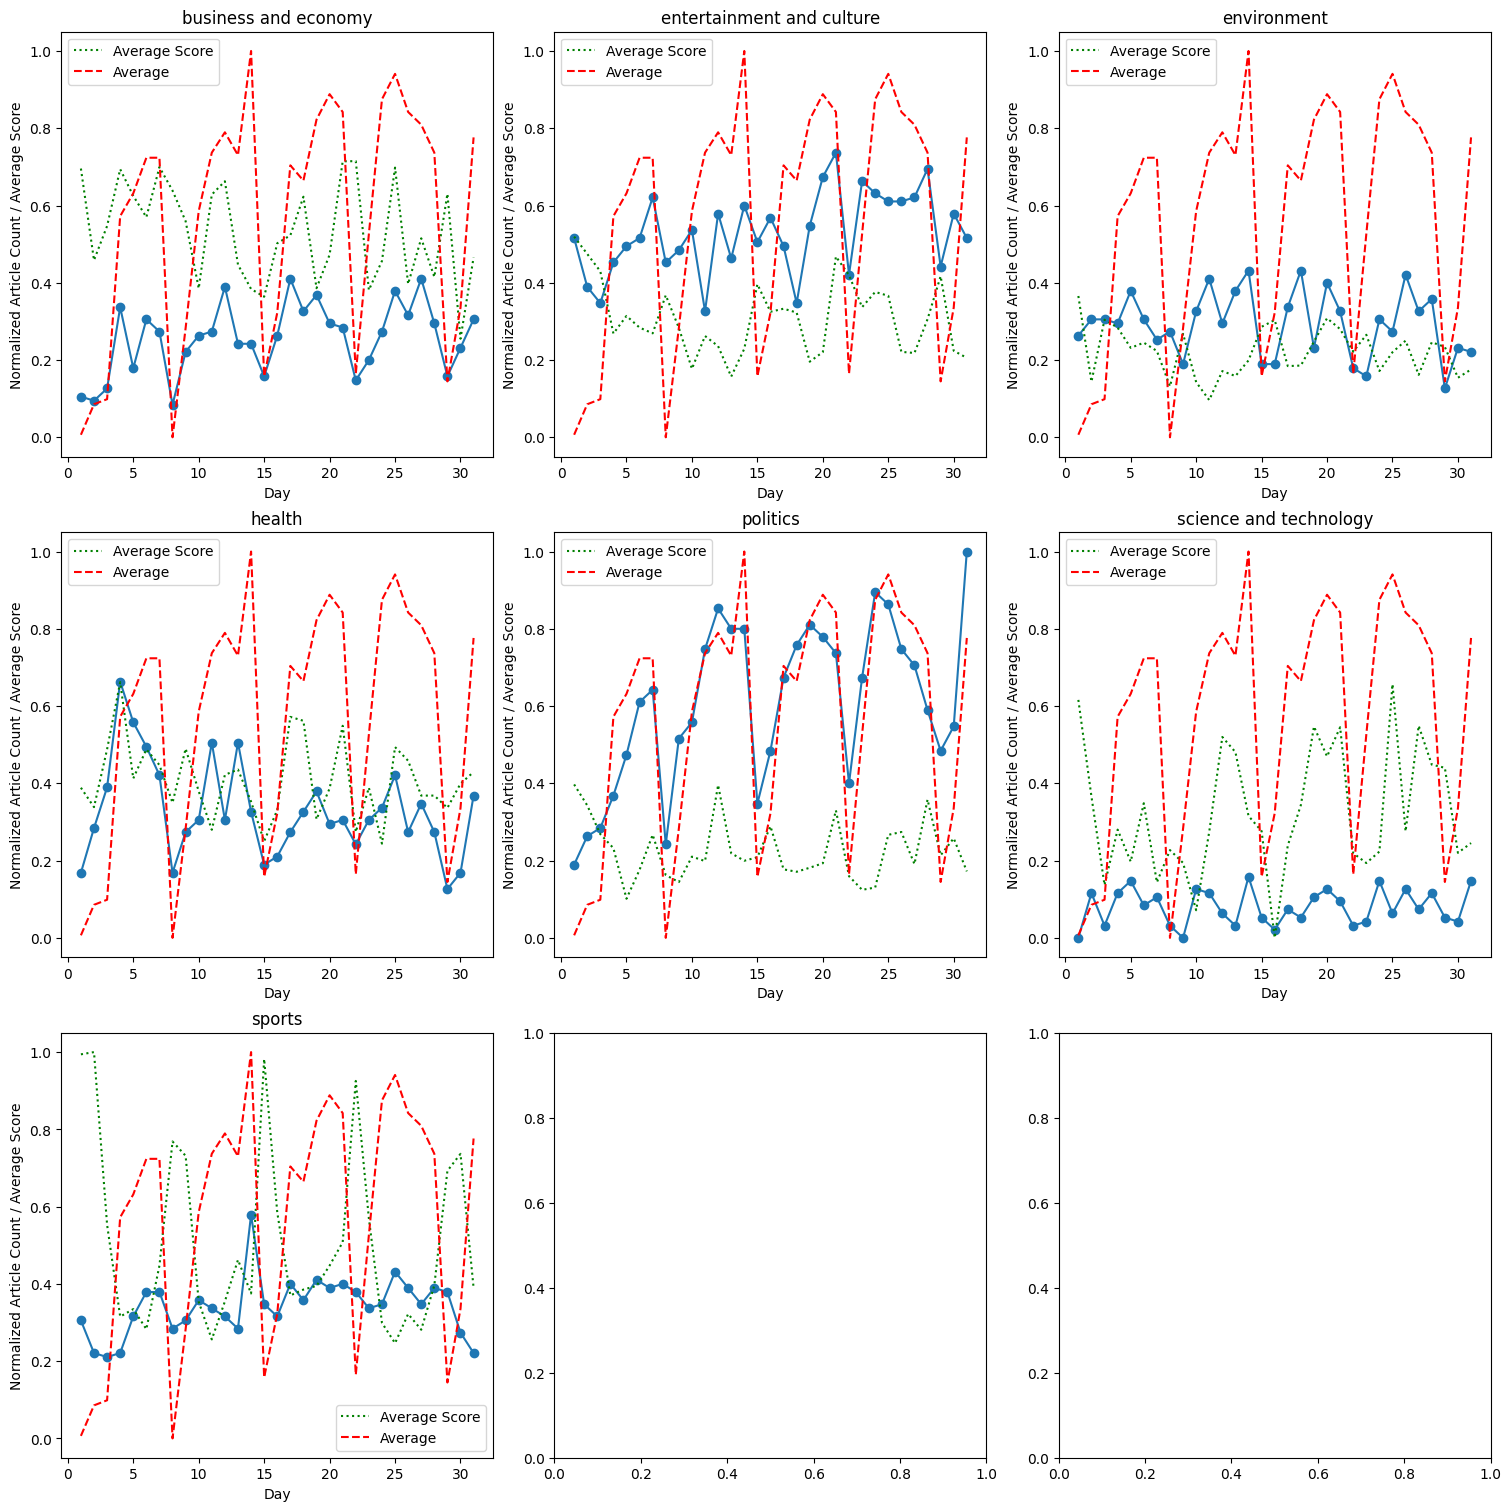

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Normalize 'Article Count' and 'Average Score'
df_grouped['Article Count'] = scaler.fit_transform(df_grouped[['Article Count']])
df_average_score['Average Score'] = scaler.fit_transform(df_average_score[['Average Score']])

# Normalize average article count for each day
df_average = pd.Series(scaler.fit_transform(df_average.values.reshape(-1, 1)).flatten(), index=df_average.index)

# Create subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 5*nrows), constrained_layout=True)
axs = axs.flatten()[:n]  

# Plot each category in its own subplot
for ax, category in zip(axs, categories):
    df_category = df_grouped[df_grouped['Category'] == category]
    df_category_score = df_average_score[df_average_score['Category'] == category]
    ax.plot(df_category['Day'], df_category['Article Count'], marker='o')
    ax.plot(df_category_score['Day'], df_category_score['Average Score'], label='Average Score', linestyle=':', color='green')  # Add average score as separate line
    ax.plot(df_average, label='Average', linestyle='--', color='red')  # Add average as reference line
    ax.set_title(category)
    ax.set_xlabel('Day')
    ax.set_ylabel('Normalized Article Count / Average Score')
    ax.legend()

# Remove unused subplots
if n < nrows*ncols:
    for i in range(n, nrows*ncols):
        fig.delaxes(axs[i])

plt.show()

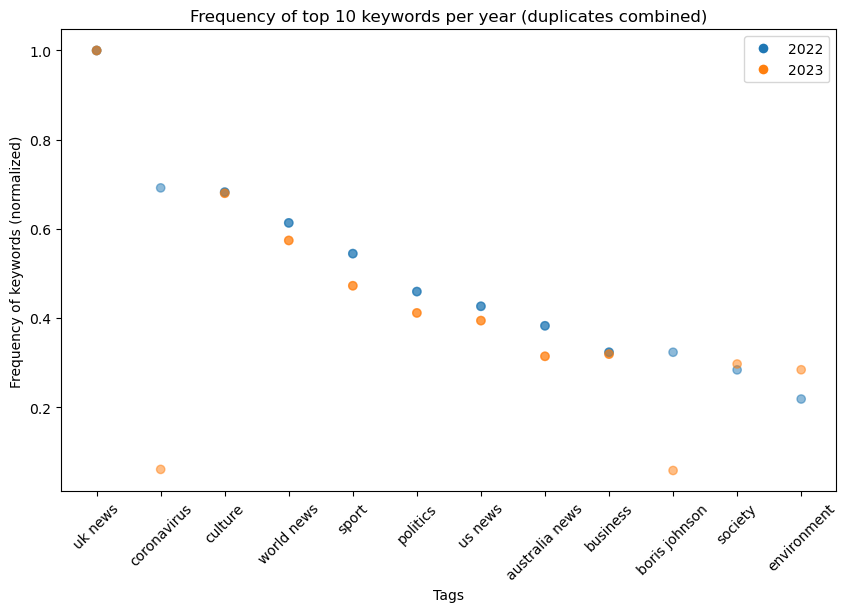

In [23]:
import ast
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
df_2022 = pd.read_csv('../../data/processed/articles/2022_articles_processed.csv', sep=";")
df_2023 = pd.read_csv('../../data/processed/articles/2023_articles_processed.csv', sep=";")

# Convert the string representation of the list to an actual list
df_2022['Tags'] = df_2022['Tags'].apply(ast.literal_eval)
df_2023['Tags'] = df_2023['Tags'].apply(ast.literal_eval)

# Separate the keywords into individual rows
tag_freq_2022 = df_2022.explode('Tags')
tag_freq_2023 = df_2023.explode('Tags')

# Count the frequency of each keyword
keyword_counts_2022 = tag_freq_2022['Tags'].value_counts()
keyword_counts_2023 = tag_freq_2023['Tags'].value_counts()

# Select the top 5 keywords for 2022 and 2023
top_5_keywords_2022 = keyword_counts_2022.nlargest(10).index.tolist()
top_5_keywords_2023 = keyword_counts_2023.nlargest(10).index.tolist()

# Concatenate the two lists
top_keywords = top_5_keywords_2022 + top_5_keywords_2023

# Normalize the y-values
max_count_2022 = keyword_counts_2022.max()
max_count_2023 = keyword_counts_2023.max()

normalized_counts_2022 = keyword_counts_2022 / max_count_2022
normalized_counts_2023 = keyword_counts_2023 / max_count_2023

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each year
colors = {'2022': '#1f77b4', '2023': '#ff7f0e'}

# Plot the frequency of each of the top 5 tags for 2022 and 2023 with normalized y-values
for keyword in top_keywords:
    ax.scatter([keyword] * 2, [normalized_counts_2022.get(keyword, 0), normalized_counts_2023.get(keyword, 0)],
               color=list(colors.values()), alpha=0.5)
ax.set_title('Frequency of top 10 keywords per year (duplicates combined)')
ax.set_xlabel('Tags')
ax.set_ylabel('Frequency of keywords (normalized)')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=v, markersize=8) for v in colors.values()]
ax.legend(handles, colors.keys())

plt.show()


